In [2]:
from utils.anomaly_detection_use_case import *
from utils.data_exploration_utils import *
from utils.data_preparation_utils import *
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


import warnings
warnings.filterwarnings("ignore")

# Retrieving Data

In [3]:
df = pd.read_excel('SWaT.A3_dataset_labelled.xlsx', engine='openpyxl', header=1)

In [4]:
df = df.iloc[1:]
df.columns.values[0] = "timestamp"
df

,timestamp,Attack,Label,FIT 101,LIT 101,MV 101,P1_STATE,P101 Status,P102 Status,AIT 201,...,LSH 601,LSH 602,LSH 603,LSL 601,LSL 602,LSL 603,P6 STATE,P601 Status,P602 Status,P603 Status
1,2019-07-20T04:30:00Z,NaN,NaN,0,729.8658,1,3,2,1,142.527557,...,"{u'IsSystem': False, u'Name': u'Active', u'Val...","{u'IsSystem': False, u'Name': u'Active', u'Val...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Active', u'Val...",2,1,1,1
2,2019-07-20T04:30:01Z,NaN,NaN,0,729.434,1,3,2,1,142.527557,...,"{u'IsSystem': False, u'Name': u'Active', u'Val...","{u'IsSystem': False, u'Name': u'Active', u'Val...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Active', u'Val...",2,1,1,1
3,2019-07-20T04:30:02.004013Z,NaN,NaN,0,729.12,1,3,2,1,142.527557,...,"{u'IsSystem': False, u'Name': u'Active', u'Val...","{u'IsSystem': False, u'Name': u'Active', u'Val...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Active', u'Val...",2,1,1,1
4,2019-07-20T04:30:03.004013Z,NaN,NaN,0,728.6882,1,3,2,1,142.527557,...,"{u'IsSystem': False, u'Name': u'Active', u'Val...","{u'IsSystem': False, u'Name': u'Active', u'Val...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Active', u'Val...",2,1,1,1
5,2019-07-20T04:30:04Z,NaN,NaN,0,727.7069,1,3,2,1,142.527557,...,"{u'IsSystem': False, u'Name': u'Active', u'Val...","{u'IsSystem': False, u'Name': u'Active', u'Val...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Active', u'Val...",2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14992,2019-07-20T08:39:55.001007Z,NaN,NaN,4.200429,491.169769,2,2,2,1,131.408615,...,"{u'IsSystem': False, u'Name': u'Active', u'Val...","{u'IsSystem': False, u'Name': u'Active', u'Val...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Active', u'Val...",2,1,1,1
14993,2019-07-20T08:39:56.0050048Z,NaN,NaN,4.253915,491.405273,2,2,2,1,131.408615,...,"{u'IsSystem': False, u'Name': u'Active', u'Val...","{u'IsSystem': False, u'Name': u'Active', u'Val...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Active', u'Val...",2,1,1,1
14994,2019-07-20T08:39:57.0050048Z,NaN,NaN,4.303558,492.3081,2,2,2,1,131.408615,...,"{u'IsSystem': False, u'Name': u'Active', u'Val...","{u'IsSystem': False, u'Name': u'Active', u'Val...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Active', u'Val...",2,1,1,1
14995,2019-07-20T08:39:58.0050048Z,NaN,NaN,4.323736,492.4651,2,2,2,1,131.408615,...,"{u'IsSystem': False, u'Name': u'Active', u'Val...","{u'IsSystem': False, u'Name': u'Active', u'Val...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Active', u'Val...",2,1,1,1


# Preprocessing

On transforme les données sous forme de dict en plusieurs colonnes pour pouvoir encoder les données. La colonne Name est supprimée car elle ne nous est pas utile, toute les valeurs sont les memes pour la meme colonne.

In [5]:
import ast


# Function to convert string representation of dictionary to actual dictionary
def string_to_dict(s):
    try:
        return ast.literal_eval(s)
    except:
        return {}

# Columns that start with "LSH-" and "LSL-"
lsh_lsl_columns = [col for col in df.columns if col.startswith("LS")]

# Extract the values from these columns
for col in lsh_lsl_columns:
    # Convert strings to dictionaries for the current column
    df[f"{col}_dict"] = df[col].apply(string_to_dict)
    
    # Extract all keys from the dictionary in separate columns
    if df[f"{col}_dict"].iloc[0]:  # Check if the dictionary is not empty
        for key in df[f"{col}_dict"].iloc[0].keys():
            if key == "Name":  # Skip the "Name" key
                continue
            df[f"{col}_{key}"] = df[f"{col}_dict"].apply(lambda x: x.get(key, None))

# Drop columns that end with "_dict"
dict_columns = [col for col in df.columns if col.endswith("_dict")]
df.drop(columns=dict_columns, inplace=True)

# drop the columns in the list lsh_lsl_columns
df.drop(columns=lsh_lsl_columns, inplace=True)


In [6]:
df.columns

Index(['timestamp', 'Attack', 'Label', 'FIT 101', 'LIT 101', 'MV 101',
       'P1_STATE', 'P101 Status', 'P102 Status', 'AIT 201', 'AIT 202',
       'AIT 203', 'FIT 201', 'MV201', 'P2_STATE', 'P201 Status', 'P202 Status',
       'P203 Status', 'P204 Status', 'P205 Status', 'P206 Status',
       'P207 Status', 'P208 Status', 'AIT 301', 'AIT 302', 'AIT 303',
       'DPIT 301', 'FIT 301', 'LIT 301', 'MV 301', 'MV 302', 'MV 303',
       'MV 304', 'P3_STATE', 'P301 Status', 'P302 Status', 'AIT 401',
       'AIT 402', 'FIT 401', 'LIT 401', 'P4_STATE', 'P401 Status',
       'P402 Status', 'P403 Status', 'P404 Status', 'UV401', 'AIT 501',
       'AIT 502', 'AIT 503', 'AIT 504', 'FIT 501', 'FIT 502', 'FIT 503',
       'FIT 504', 'MV 501', 'MV 502', 'MV 503', 'MV 504', 'P5_STATE',
       'P501 Status', 'P502 Status', 'PIT 501', 'PIT 502', 'PIT 503',
       'FIT 601', 'P6 STATE', 'P601 Status', 'P602 Status', 'P603 Status',
       'LS 201_IsSystem', 'LS 201_Value', 'LS 202_IsSystem', 'LS 202_Valu

Compléter la colonne ‘Attack’ avec la valeur ‘benign’ si elle n’est pas définie et la colonne ‘Label’ avec 0 si elle n’est pas définie

In [7]:
# Compléter la colonne ‘Attack’ avec la valeur ‘benign’ si elle n’est pas définie et la colonne ‘Label’ avec 0 si elle n’est pas définie
df['Attack'] = df['Attack'].fillna('benign')
df['Label'] = df['Label'].fillna(0)
df['Label'] = df['Label'].astype(int)

Identifiez et visualisez les outliers (d’après Isolation Forrest ; d’après LOF)

In [8]:
potential_numeric_cols = df.columns[3:]
# Infer the types of the columns knowing some should keep object type
# Loop on each column, look at the first value and infer the type
for col in potential_numeric_cols:
    try:
        df[col] = pd.to_numeric(df[col])
    except:
        print(f"Could not convert column {col} to numeric")


In [9]:
# Print unique attacks type
print(df['Attack'].unique())

['benign' 'Spoofing' 'Switch_ON' 'Switch_close' 'Switch_off']


In [10]:
# Get all the columns except the first 3 (timestamp, Attack, Label)
df_to_enc = df.iloc[:, 2:]
df_to_enc

,Label,FIT 101,LIT 101,MV 101,P1_STATE,P101 Status,P102 Status,AIT 201,AIT 202,AIT 203,...,LSH 602_IsSystem,LSH 602_Value,LSH 603_IsSystem,LSH 603_Value,LSL 601_IsSystem,LSL 601_Value,LSL 602_IsSystem,LSL 602_Value,LSL 603_IsSystem,LSL 603_Value
1,0,0.000000,729.865800,1,3,2,1,142.527557,9.293002,198.077423,...,False,1,False,0,False,0,False,0,False,1
2,0,0.000000,729.434000,1,3,2,1,142.527557,9.293002,198.385025,...,False,1,False,0,False,0,False,0,False,1
3,0,0.000000,729.120000,1,3,2,1,142.527557,9.293002,198.436300,...,False,1,False,0,False,0,False,0,False,1
4,0,0.000000,728.688200,1,3,2,1,142.527557,9.289157,198.667000,...,False,1,False,0,False,0,False,0,False,1
5,0,0.000000,727.706900,1,3,2,1,142.527557,9.289157,198.897720,...,False,1,False,0,False,0,False,0,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14992,0,4.200429,491.169769,2,2,2,1,131.408615,9.319918,257.703156,...,False,1,False,0,False,0,False,0,False,1
14993,0,4.253915,491.405273,2,2,2,1,131.408615,9.317354,257.703156,...,False,1,False,0,False,0,False,0,False,1
14994,0,4.303558,492.308100,2,2,2,1,131.408615,9.317354,257.703156,...,False,1,False,0,False,0,False,0,False,1
14995,0,4.323736,492.465100,2,2,2,1,131.408615,9.316713,257.703156,...,False,1,False,0,False,0,False,0,False,1


In [11]:
one_hot_enc = get_one_hot_encoded_dataframe(df_to_enc)
one_hot_enc

,Label,FIT 101,LIT 101,MV 101,P1_STATE,P101 Status,P102 Status,AIT 201,AIT 202,AIT 203,...,LSH 602_IsSystem,LSH 602_Value,LSH 603_IsSystem,LSH 603_Value,LSL 601_IsSystem,LSL 601_Value,LSL 602_IsSystem,LSL 602_Value,LSL 603_IsSystem,LSL 603_Value
1,0,0.000000,729.865800,1,3,2,1,142.527557,9.293002,198.077423,...,False,1,False,0,False,0,False,0,False,1
2,0,0.000000,729.434000,1,3,2,1,142.527557,9.293002,198.385025,...,False,1,False,0,False,0,False,0,False,1
3,0,0.000000,729.120000,1,3,2,1,142.527557,9.293002,198.436300,...,False,1,False,0,False,0,False,0,False,1
4,0,0.000000,728.688200,1,3,2,1,142.527557,9.289157,198.667000,...,False,1,False,0,False,0,False,0,False,1
5,0,0.000000,727.706900,1,3,2,1,142.527557,9.289157,198.897720,...,False,1,False,0,False,0,False,0,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14992,0,4.200429,491.169769,2,2,2,1,131.408615,9.319918,257.703156,...,False,1,False,0,False,0,False,0,False,1
14993,0,4.253915,491.405273,2,2,2,1,131.408615,9.317354,257.703156,...,False,1,False,0,False,0,False,0,False,1
14994,0,4.303558,492.308100,2,2,2,1,131.408615,9.317354,257.703156,...,False,1,False,0,False,0,False,0,False,1
14995,0,4.323736,492.465100,2,2,2,1,131.408615,9.316713,257.703156,...,False,1,False,0,False,0,False,0,False,1


In [12]:
l1 = df_to_enc.columns.to_list()
l2 = one_hot_enc.columns.to_list()

In [13]:
def compare_lists(l1, l2):
    common_vars = set(l1) & set(l2)
    only_in_l1 = set(l1) - set(l2)
    only_in_l2 = set(l2) - set(l1)
    
    print("Common variables:", common_vars)
    print("Only in l1:", only_in_l1)
    print("Only in l2:", only_in_l2)

compare_lists(l1, l2)


Common variables: {'P403 Status', 'P203 Status', 'PIT 502', 'P6 STATE', 'MV 304', 'AIT 302', 'LSL 602_Value', 'P201 Status', 'MV 302', 'LSL 602_IsSystem', 'P204 Status', 'FIT 502', 'P2_STATE', 'AIT 301', 'AIT 503', 'MV 504', 'LS 201_Value', 'LS 401_Value', 'PIT 501', 'P404 Status', 'FIT 601', 'LS 202_IsSystem', 'LSLL 203_Value', 'AIT 201', 'AIT 203', 'P602 Status', 'Label', 'LSL 601_Value', 'MV 502', 'P4_STATE', 'LSL 601_IsSystem', 'P601 Status', 'AIT 303', 'P401 Status', 'MV 101', 'FIT 501', 'AIT 502', 'FIT 503', 'AIT 402', 'LSL 603_IsSystem', 'LSL 603_Value', 'P101 Status', 'LSH 602_Value', 'LSH 603_Value', 'LSLL 203_IsSystem', 'AIT 504', 'LIT 301', 'MV 501', 'FIT 101', 'PIT 503', 'P202 Status', 'P206 Status', 'MV 301', 'LSL 203_IsSystem', 'P3_STATE', 'LIT 101', 'P1_STATE', 'P207 Status', 'UV401', 'P301 Status', 'P5_STATE', 'LSH 601_IsSystem', 'P603 Status', 'AIT 202', 'P102 Status', 'DPIT 301', 'FIT 301', 'LSH 601_Value', 'FIT 201', 'MV 503', 'P205 Status', 'P302 Status', 'P402 Stat

In [14]:
# Save one hot enc as csv
one_hot_enc.to_csv("data/one_hot_enc.csv", index=False)


# Anomaly detection

func for confusion matrix

In [15]:
def plot_confusion_matrix(df, actual_col, predicted_col):
    """
    Plots a 2x2 confusion matrix using Seaborn.

    Args:
    - df (pd.DataFrame): The DataFrame containing the data.
    - actual_col (str): The column name of the actual labels.
    - predicted_col (str): The column name of the predicted labels (or in this case, outlier indicators).
    """
    
    matrix = confusion_matrix(df[actual_col], df[predicted_col])

    df_confusion = pd.DataFrame(matrix, index=['True 0', 'True 1'], columns=['Pred 0', 'Pred 1'])
    
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.heatmap(df_confusion, annot=True, fmt='g', cmap='Blues', linewidths=.5, ax=ax)

    plt.title("Confusion Matrix", fontsize=20)
    plt.xlabel("Predicted", fontsize=18)
    plt.ylabel("Actual", fontsize=18)
    plt.show()

# For usage, you'd call it like:
# plot_confusion_matrix(df_analysis, 'Label', 'if_outlier')


## Isolation Forest

In [16]:
if_outliers = get_list_of_if_outliers(one_hot_enc.iloc[:, 1:], outlier_fraction=0.05)
len(if_outliers)

750

In [17]:
df_analysis = df.copy()
# Create a column outlier that has 1 if index corresponds to an outlier, 0 otherwise
df_analysis['if_outlier'] = 0
df_analysis.loc[if_outliers, 'if_outlier'] = 1
df_analysis

,timestamp,Attack,Label,FIT 101,LIT 101,MV 101,P1_STATE,P101 Status,P102 Status,AIT 201,...,LSH 602_Value,LSH 603_IsSystem,LSH 603_Value,LSL 601_IsSystem,LSL 601_Value,LSL 602_IsSystem,LSL 602_Value,LSL 603_IsSystem,LSL 603_Value,if_outlier
1,2019-07-20T04:30:00Z,benign,0,0.000000,729.865800,1,3,2,1,142.527557,...,1,False,0,False,0,False,0,False,1,1
2,2019-07-20T04:30:01Z,benign,0,0.000000,729.434000,1,3,2,1,142.527557,...,1,False,0,False,0,False,0,False,1,1
3,2019-07-20T04:30:02.004013Z,benign,0,0.000000,729.120000,1,3,2,1,142.527557,...,1,False,0,False,0,False,0,False,1,1
4,2019-07-20T04:30:03.004013Z,benign,0,0.000000,728.688200,1,3,2,1,142.527557,...,1,False,0,False,0,False,0,False,1,1
5,2019-07-20T04:30:04Z,benign,0,0.000000,727.706900,1,3,2,1,142.527557,...,1,False,0,False,0,False,0,False,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14992,2019-07-20T08:39:55.001007Z,benign,0,4.200429,491.169769,2,2,2,1,131.408615,...,1,False,0,False,0,False,0,False,1,0
14993,2019-07-20T08:39:56.0050048Z,benign,0,4.253915,491.405273,2,2,2,1,131.408615,...,1,False,0,False,0,False,0,False,1,0
14994,2019-07-20T08:39:57.0050048Z,benign,0,4.303558,492.308100,2,2,2,1,131.408615,...,1,False,0,False,0,False,0,False,1,0
14995,2019-07-20T08:39:58.0050048Z,benign,0,4.323736,492.465100,2,2,2,1,131.408615,...,1,False,0,False,0,False,0,False,1,0


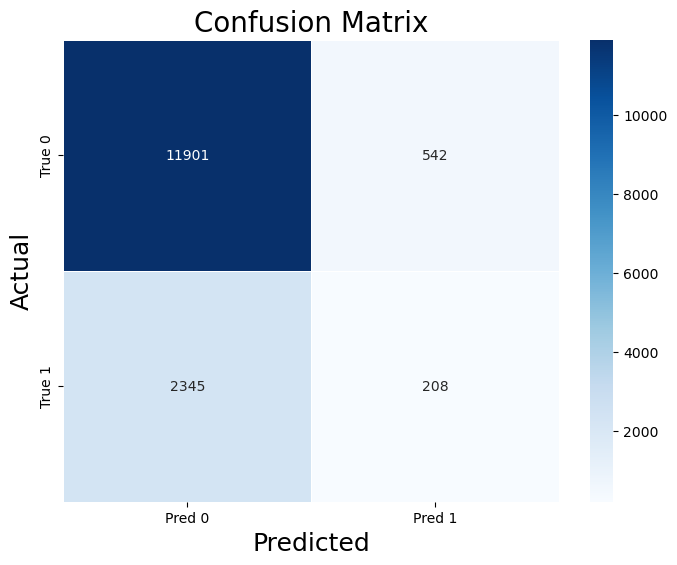

In [18]:
plot_confusion_matrix(df_analysis, 'Label', 'if_outlier')

## Local Outlier Factor

In [19]:
lof_outliers = get_list_of_lof_outliers(one_hot_enc.iloc[:, 1:], outlier_fraction=0.05)
df_analysis['lof_outlier'] = 0
df_analysis.loc[lof_outliers, 'lof_outlier'] = 1

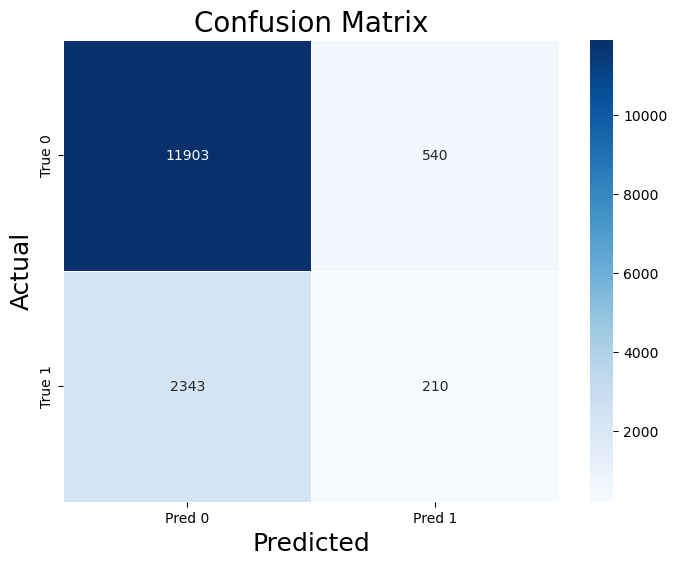

In [20]:
plot_confusion_matrix(df_analysis, 'Label', 'lof_outlier')

### Analysis

In [21]:
# Count the label == 1 for each attack type
df_analysis['Attack'].value_counts()

benign          12443
Switch_off       1362
Switch_ON         680
Spoofing          367
Switch_close      144
Name: Attack, dtype: int64

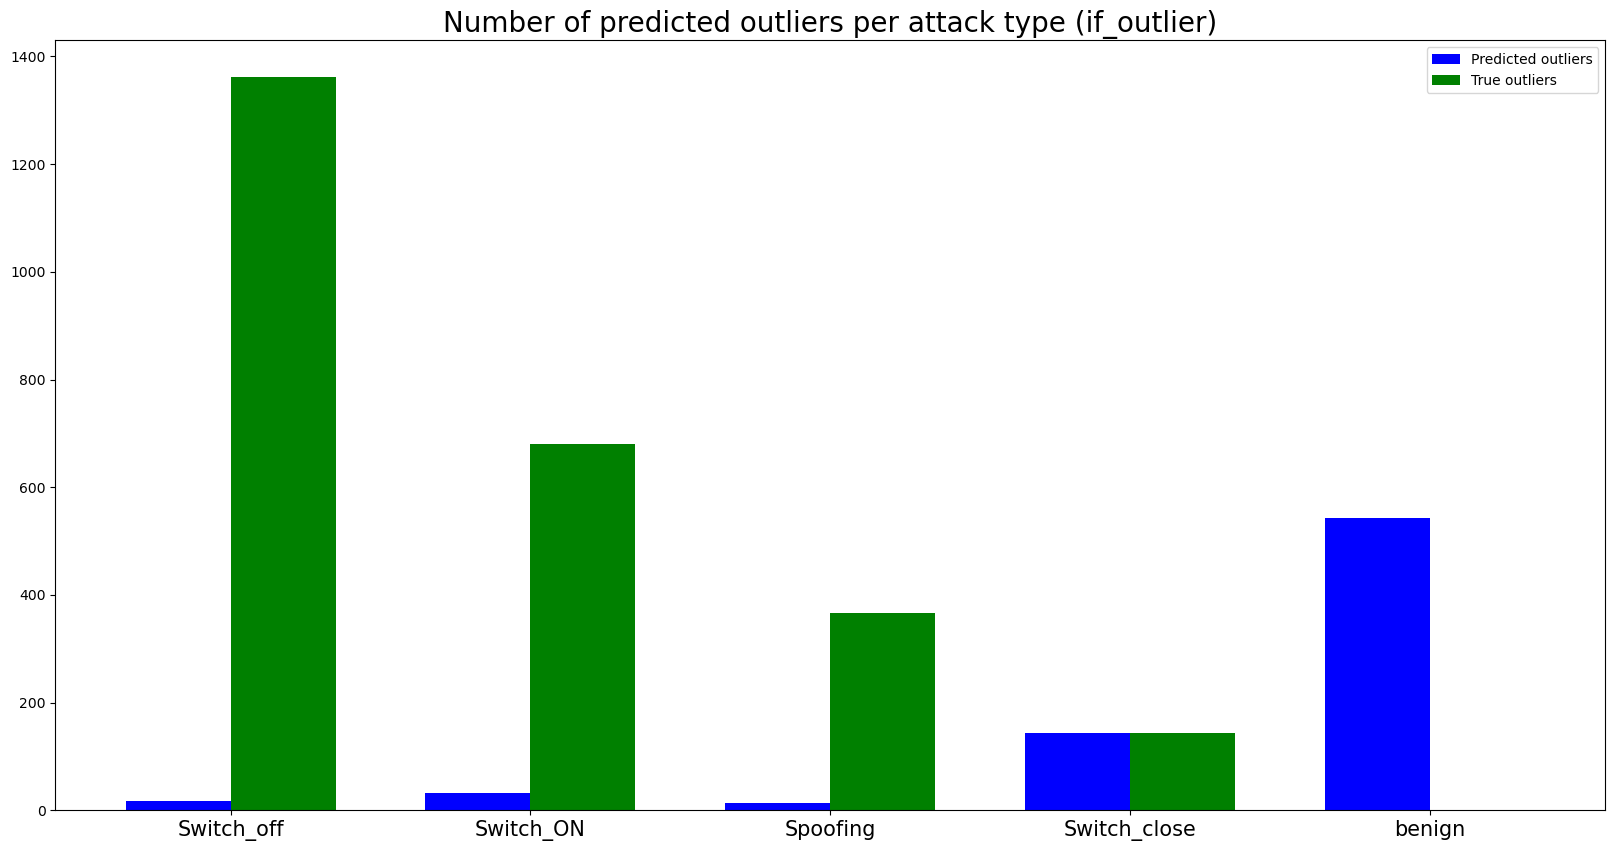

In [22]:
import matplotlib.pyplot as plt
def visualize_outliers(df, col_name):
    outliers = df[(df[col_name] == 1)]
    outliers_true = df[(df['Label'] == 1)]

    plt.figure(figsize=(20, 10))
    width = 0.35

    # Sort the data by the number of "True outliers" in descending order
    outliers_true_counts = outliers_true['Attack'].value_counts()
    outliers_counts = outliers['Attack'].value_counts()

    # Add the 'benign' attack type to the outliers_true_counts Series with value of 0
    outliers_true_counts['benign'] = 0
    # Reorder the outliers_counts Series to match the order of outliers_true_counts
    outliers_counts = outliers_counts[outliers_true_counts.index]
    
    plt.bar([x for x in range(len(outliers_counts))], outliers_counts.values, color='blue', label='Predicted outliers', width=width)
    plt.bar([x + width for x in range(len(outliers_true_counts))], outliers_true_counts.values, color='green', label='True outliers', width=width)

    plt.xticks([x + width/2 for x in range(len(outliers_true_counts))], outliers_true_counts.index, fontsize=15)

    plt.title(f"Number of predicted outliers per attack type ({col_name})", fontsize=20)
    plt.legend()

visualize_outliers(df_analysis, 'if_outlier')

### Segmenting each plant into datframes

In [23]:
# Convert set to list and sort
numeric_identifiers_list = ['10', '20','30', '40', '50', '60']

# Split the dataset based on numeric identifiers
split_dataframes = {}
for num in numeric_identifiers_list:
    # Append Attack and Label columns
    cols_for_num = ['Label']
    cols_for_num.extend([col for col in one_hot_enc.columns if num in col])
    
    split_dataframes[f"P{int(num) // 10 }"] = one_hot_enc[cols_for_num]

In [24]:
split_dataframes['P5']

,Label,AIT 501,AIT 502,AIT 503,AIT 504,FIT 501,FIT 502,FIT 503,FIT 504,MV 501,MV 502,MV 503,MV 504,P501 Status,P502 Status,PIT 501,PIT 502,PIT 503
1,0,7.489618,147.398100,1016.27789,46.065113,0.781594,0.310362,0.623628,0.213432,2,2,1,1,2,1,167.601257,2.963509,119.921173
2,0,7.489618,147.398100,1016.27789,45.757500,0.782235,0.315102,0.623628,0.212984,2,2,1,1,2,1,167.601257,2.963509,119.921173
3,0,7.489618,147.398100,1016.27789,45.603690,0.782235,0.317023,0.623628,0.212984,2,2,1,1,2,1,167.601257,2.963509,119.921173
4,0,7.489618,147.167389,1016.27789,45.603690,0.783133,0.308057,0.623628,0.212792,2,2,1,1,2,1,167.601257,2.963509,119.921173
5,0,7.489618,147.090485,1016.27789,45.219173,0.783773,0.303446,0.623628,0.214009,2,2,1,1,2,1,167.601257,2.963509,119.921173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14992,0,7.765830,63.752884,1016.21381,24.839785,0.809536,0.366594,0.607752,0.209909,2,2,1,1,2,1,158.773392,2.498959,113.784927
14993,0,7.765830,63.752884,1016.21381,24.839785,0.809536,0.374023,0.605960,0.209909,2,2,1,1,2,1,158.805435,2.498959,113.784927
14994,0,7.765830,63.752884,1016.21381,24.839785,0.809536,0.369156,0.605960,0.209909,2,2,1,1,2,1,158.853500,2.498959,113.784927
14995,0,7.765830,63.752884,1016.21381,24.839785,0.809536,0.357115,0.605960,0.209909,2,2,1,1,2,1,158.853500,2.498959,113.784927


In [25]:
def get_ratio_if_outliers(df):
    if_outliers = get_list_of_if_outliers(df.iloc[:, 1:], outlier_fraction=0.01)
    df['if_outlier'] = 0
    df.loc[if_outliers, 'if_outlier'] = 1
    # df[df['if_outlier'] == 1]['Label'].value_counts()
    return if_outliers

In [26]:
def get_ratio_lof_outliers(df):
    lof_outliers = get_list_of_lof_outliers(df.iloc[:, 1:], outlier_fraction=0.01)
    df['lof_outlier'] = 0
    df.loc[lof_outliers, 'lof_outlier'] = 1
    # return df[df['lof_outlier'] == 1]['Label'].value_counts()
    return lof_outliers

In [27]:
df_analysis2 = df.copy()
# Create a column outlier that has 1 if index corresponds to an outlier, 0 otherwise

all_if_outliers = []
all_lof_outliers = []
for key, value in split_dataframes.items():
    # print("If_outliers ratio: ", key)
    all_if_outliers.append(get_ratio_if_outliers(value))
    all_lof_outliers.append(get_ratio_lof_outliers(df))

array = np.array(all_if_outliers)
merged_list = [item for sublist in array for item in sublist]
if_outliers = list(np.unique(merged_list))

array = np.array(all_lof_outliers)
merged_list = [item for sublist in array for item in sublist]
lof_outliers = list(np.unique(merged_list))

df_analysis2['if_outlier'] = 0
df_analysis2.loc[if_outliers, 'if_outlier'] = 1
#df_analysis2

df_analysis2['lof_outlier'] = 0
df_analysis2.loc[lof_outliers, 'lof_outlier'] = 1
#df_analysis2

print(df_analysis2[df_analysis2['if_outlier'] == 1]['Label'].value_counts())
print(df_analysis2[df_analysis2['lof_outlier'] == 1]['Label'].value_counts())

0    327
1    298
Name: Label, dtype: int64
0    111
1     43
Name: Label, dtype: int64


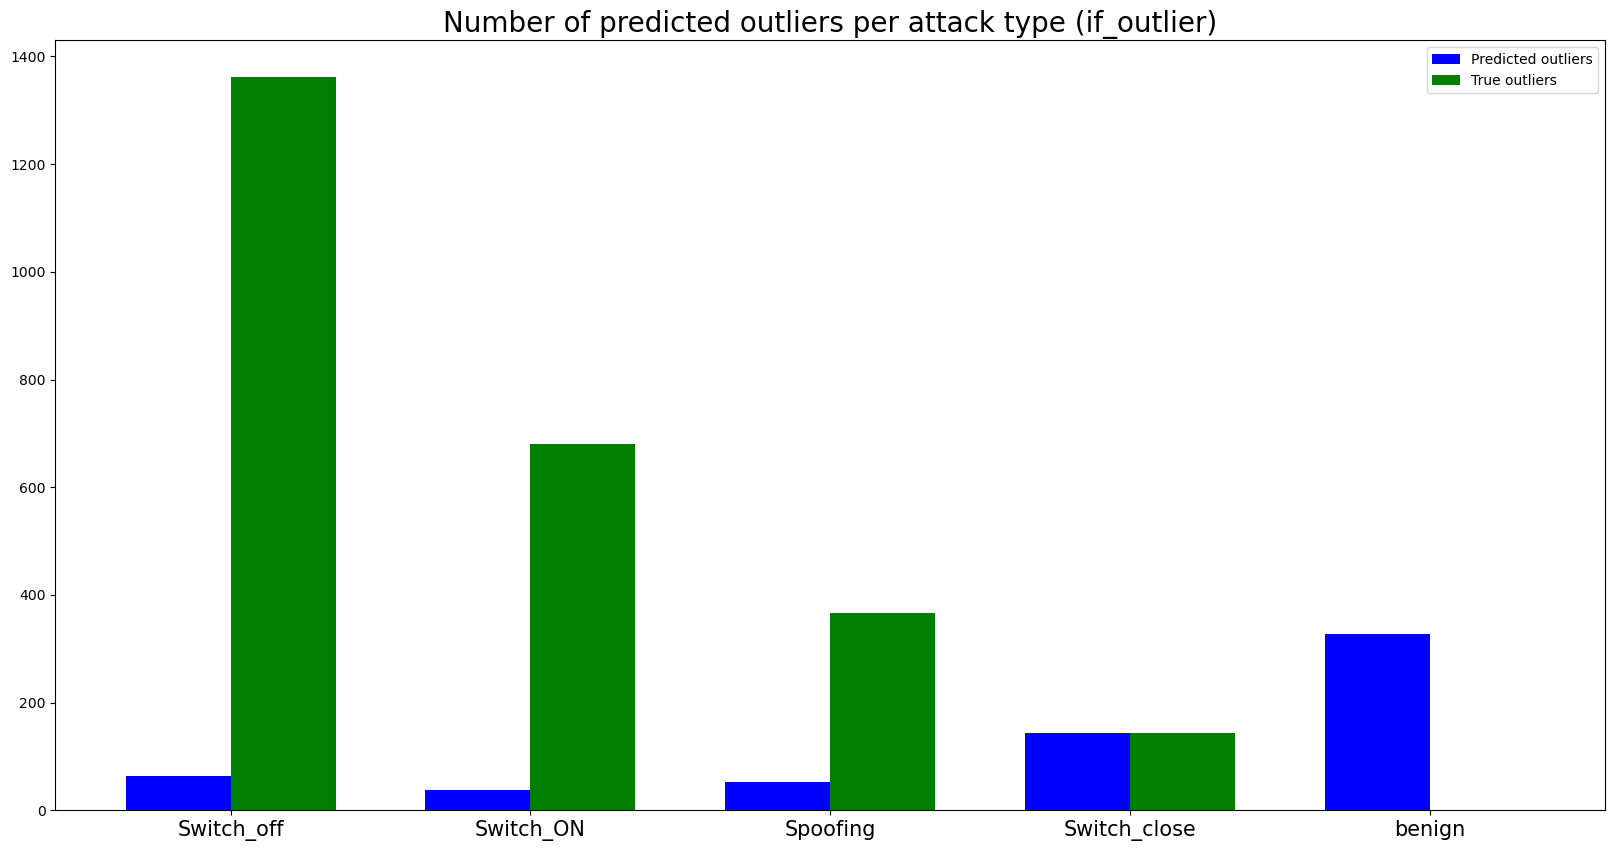

In [28]:
visualize_outliers(df_analysis2, 'if_outlier')

The results are not better than single dataframe.

## LSTM and RMS

In [29]:
# Split the dataset based on numeric identifiers
split_dataframes = {}
for num in numeric_identifiers_list:
    # Append Attack and Label columns
    cols_for_num = ['Label']
    cols_for_num.extend([col for col in one_hot_enc.columns if num in col])
    
    split_dataframes[f"P{int(num) // 10 }"] = one_hot_enc[cols_for_num]
split_dataframes['P1']

,Label,FIT 101,LIT 101,MV 101,P101 Status,P102 Status
1,0,0.000000,729.865800,1,2,1
2,0,0.000000,729.434000,1,2,1
3,0,0.000000,729.120000,1,2,1
4,0,0.000000,728.688200,1,2,1
5,0,0.000000,727.706900,1,2,1
...,...,...,...,...,...,...
14992,0,4.200429,491.169769,2,2,1
14993,0,4.253915,491.405273,2,2,1
14994,0,4.303558,492.308100,2,2,1
14995,0,4.323736,492.465100,2,2,1


In [30]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, RepeatVector, TimeDistributed, Dense, Dropout, BatchNormalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam

# Only take rows in one_hot_enc that has a Label == 0
#data = one_hot_enc.iloc[:, 1:][one_hot_enc['Label'] == 0]

# train on adata before 9000
data = one_hot_enc.iloc[:9000, 1:][one_hot_enc['Label'] == 0]
print(data)

# Apply min-max scaling
scaler = MinMaxScaler()
data = scaler.fit_transform(data)
data


      FIT 101     LIT 101  MV 101  P1_STATE  P101 Status  P102 Status  \
1         0.0  729.865800       1         3            2            1   
2         0.0  729.434000       1         3            2            1   
3         0.0  729.120000       1         3            2            1   
4         0.0  728.688200       1         3            2            1   
5         0.0  727.706900       1         3            2            1   
...       ...         ...     ...       ...          ...          ...   
8996      0.0  820.461100       1         2            1            1   
8997      0.0  820.853700       1         2            1            1   
8998      0.0  821.049900       1         2            1            1   
8999      0.0  820.814453       1         2            1            1   
9000      0.0  820.814453       1         2            1            1   

         AIT 201   AIT 202     AIT 203   FIT 201  ...  LSH 602_IsSystem  \
1     142.527557  9.293002  198.077423  2.335437

array([[0.        , 0.71482317, 0.5       , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.71353006, 0.5       , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.71258972, 0.5       , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.98789225, 0.5       , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.98718716, 0.5       , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.98718716, 0.5       , ..., 0.        , 0.        ,
        0.        ]])

In [31]:
window_size = 10

X_attack, y_attack = [], []
for i in range(len(data) - window_size):
    X_attack.append(data[i:i + window_size])
    y_attack.append(data[i + window_size])

X_attack = np.array(X_attack)
y_attack = np.array(y_attack)

num_features = X_attack.shape[2]

X_train, X_test, y_train, y_test = train_test_split(X_attack, y_attack, test_size=0.2, random_state=42)
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")

# Create a sequential model
model = Sequential(
    [
        LSTM(64, input_shape=(window_size, num_features), return_sequences=True),
        Dropout(0.5),
        LSTM(64, return_sequences=False),
        Dropout(0.5),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(num_features, activation='linear')
    ]
)

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse')

# Implement early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)

epochs = 10
batch_size = 256

# Train the model with validation data and early stopping
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), callbacks=[early_stopping], shuffle=True)

X_train shape: (7192, 10, 88), y_train shape: (7192, 88)
Epoch 1/10
29/29 [==============================] - 4s 44ms/step - loss: 0.1162 - val_loss: 0.0688
Epoch 2/10
29/29 [==============================] - 0s 16ms/step - loss: 0.0649 - val_loss: 0.0356
Epoch 3/10
29/29 [==============================] - 0s 16ms/step - loss: 0.0442 - val_loss: 0.0274
Epoch 4/10
29/29 [==============================] - 0s 17ms/step - loss: 0.0359 - val_loss: 0.0209
Epoch 5/10
29/29 [==============================] - 0s 17ms/step - loss: 0.0300 - val_loss: 0.0165
Epoch 6/10
29/29 [==============================] - 0s 16ms/step - loss: 0.0257 - val_loss: 0.0132
Epoch 7/10
29/29 [==============================] - 0s 16ms/step - loss: 0.0228 - val_loss: 0.0119
Epoch 8/10
29/29 [==============================] - 0s 17ms/step - loss: 0.0206 - val_loss: 0.0097
Epoch 9/10
29/29 [==============================] - 0s 17ms/step - loss: 0.0192 - val_loss: 0.0090
Epoch 10/10
29/29 [==============================] -

In [32]:
# Take window_size rows juste before the first Label == 1
data_attack = one_hot_enc.iloc[:, 1:][one_hot_enc['Label'] == 1]
# Take window_size rows juste before the first index of data_attack inside split_dataframes['P1'].iloc[:, 1:]
index = one_hot_enc.iloc[:, 1:].index.get_loc(data_attack.index[0])
data = one_hot_enc.iloc[:, 1:][index - window_size:index]
# Get the row attack at index
attack = one_hot_enc.iloc[:, 1:][index:index + 1]
data

,FIT 101,LIT 101,MV 101,P1_STATE,P101 Status,P102 Status,AIT 201,AIT 202,AIT 203,FIT 201,...,LSH 602_IsSystem,LSH 602_Value,LSH 603_IsSystem,LSH 603_Value,LSL 601_IsSystem,LSL 601_Value,LSL 602_IsSystem,LSL 602_Value,LSL 603_IsSystem,LSL 603_Value
9407,0.0,820.421900,1,2,1,1,143.969500,9.094336,243.117157,0.000513,...,False,1,False,0,False,0,False,0,False,1
9408,0.0,820.500400,1,2,1,1,143.969500,9.094336,243.117157,0.000513,...,False,1,False,0,False,0,False,0,False,1
9409,0.0,820.186400,1,2,1,1,143.969500,9.094336,243.117157,0.000513,...,False,1,False,0,False,0,False,0,False,1
9410,0.0,820.225647,1,2,1,1,144.001541,9.094336,243.117157,0.000513,...,False,1,False,0,False,0,False,0,False,1
9411,0.0,820.068600,1,2,1,1,144.097672,9.096579,243.117157,0.000513,...,False,1,False,0,False,0,False,0,False,1
9412,0.0,820.382600,1,2,1,1,144.097672,9.097540,243.117157,0.000513,...,False,1,False,0,False,0,False,0,False,1
9413,0.0,820.382600,1,2,1,1,144.097672,9.097540,243.117157,0.000513,...,False,1,False,0,False,0,False,0,False,1
9414,0.0,820.618164,1,2,1,1,144.097672,9.098181,243.117157,0.000513,...,False,1,False,0,False,0,False,0,False,1
9415,0.0,820.461100,1,2,1,1,144.097672,9.099142,243.117157,0.000513,...,False,1,False,0,False,0,False,0,False,1
9416,0.0,820.578900,1,2,1,1,144.097672,9.099142,243.117157,0.000513,...,False,1,False,0,False,0,False,0,False,1


Computing RMS of a prediction compared to an attack row:

In [33]:
data = scaler.fit_transform(data)
attack = scaler.fit_transform(attack)

X = []
X.append(data)

X = np.array(X)
pred = model.predict(X)

# RMS deviation
np.sqrt(np.mean(np.square(pred - attack)))

1/1 [==============================] - 1s 676ms/step


0.2445119898026456

Computing RMS of a prediction compared to a benign row:

In [34]:
benign_data = one_hot_enc.iloc[:, 1:][one_hot_enc['Label'] == 0]

# Apply min-max scaling
benign_data = scaler.fit_transform(benign_data)

X_benign, y_benign = [], []
X_benign.append(benign_data[0:window_size])
y_benign.append(benign_data[window_size])

X_benign = np.array(X_benign)
y_benign = np.array(y_benign)

# Use the model to make predictions
benign_pred = model.predict(X_benign)

# Calculate RMS deviation of benign data
rms_benign = np.mean(np.sqrt(np.abs(y_benign - benign_pred)))
rms_benign

1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 13ms/step


0.27491103639946846

In [35]:
#take data on whole dataset

data = one_hot_enc.iloc[:, 1:]
print(data)

# Apply min-max scaling
scaler = MinMaxScaler()
data = scaler.fit_transform(data)
data

        FIT 101     LIT 101  MV 101  P1_STATE  P101 Status  P102 Status  \
1      0.000000  729.865800       1         3            2            1   
2      0.000000  729.434000       1         3            2            1   
3      0.000000  729.120000       1         3            2            1   
4      0.000000  728.688200       1         3            2            1   
5      0.000000  727.706900       1         3            2            1   
...         ...         ...     ...       ...          ...          ...   
14992  4.200429  491.169769       2         2            2            1   
14993  4.253915  491.405273       2         2            2            1   
14994  4.303558  492.308100       2         2            2            1   
14995  4.323736  492.465100       2         2            2            1   
14996  4.323736  492.896881       2         2            2            1   

          AIT 201   AIT 202     AIT 203   FIT 201  ...  LSH 602_IsSystem  \
1      142.527557  9.29

array([[0.        , 0.71482317, 0.5       , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.71353006, 0.5       , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.71258972, 0.5       , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.97730752, 0.00340896, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.98188965, 0.00387913, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.98188965, 0.00517218, 1.        , ..., 0.        , 0.        ,
        0.        ]])

In [36]:
X_attack, y_attack = [], []
for i in range(len(data) - window_size):
    X_attack.append(data[i:i + window_size])
    y_attack.append(data[i + window_size])

X_attack = np.array(X_attack)
y_attack = np.array(y_attack)

In [37]:
# Use the model to make predictions on the whole dataset and print the RMS deviation over the whole dataset
pred = model.predict(X_attack)
rms = np.mean(np.sqrt(np.abs(y_attack - pred)), axis=1)

  1/469 [..............................] - ETA: 7s

469/469 [==============================] - 1s 2ms/step


In [38]:
print(rms.shape)
print(X_attack.shape)
print(y_attack.shape)
print(pred.shape)

(14986,)
(14986, 10, 88)
(14986, 88)
(14986, 88)


<BarContainer object of 2553 artists>

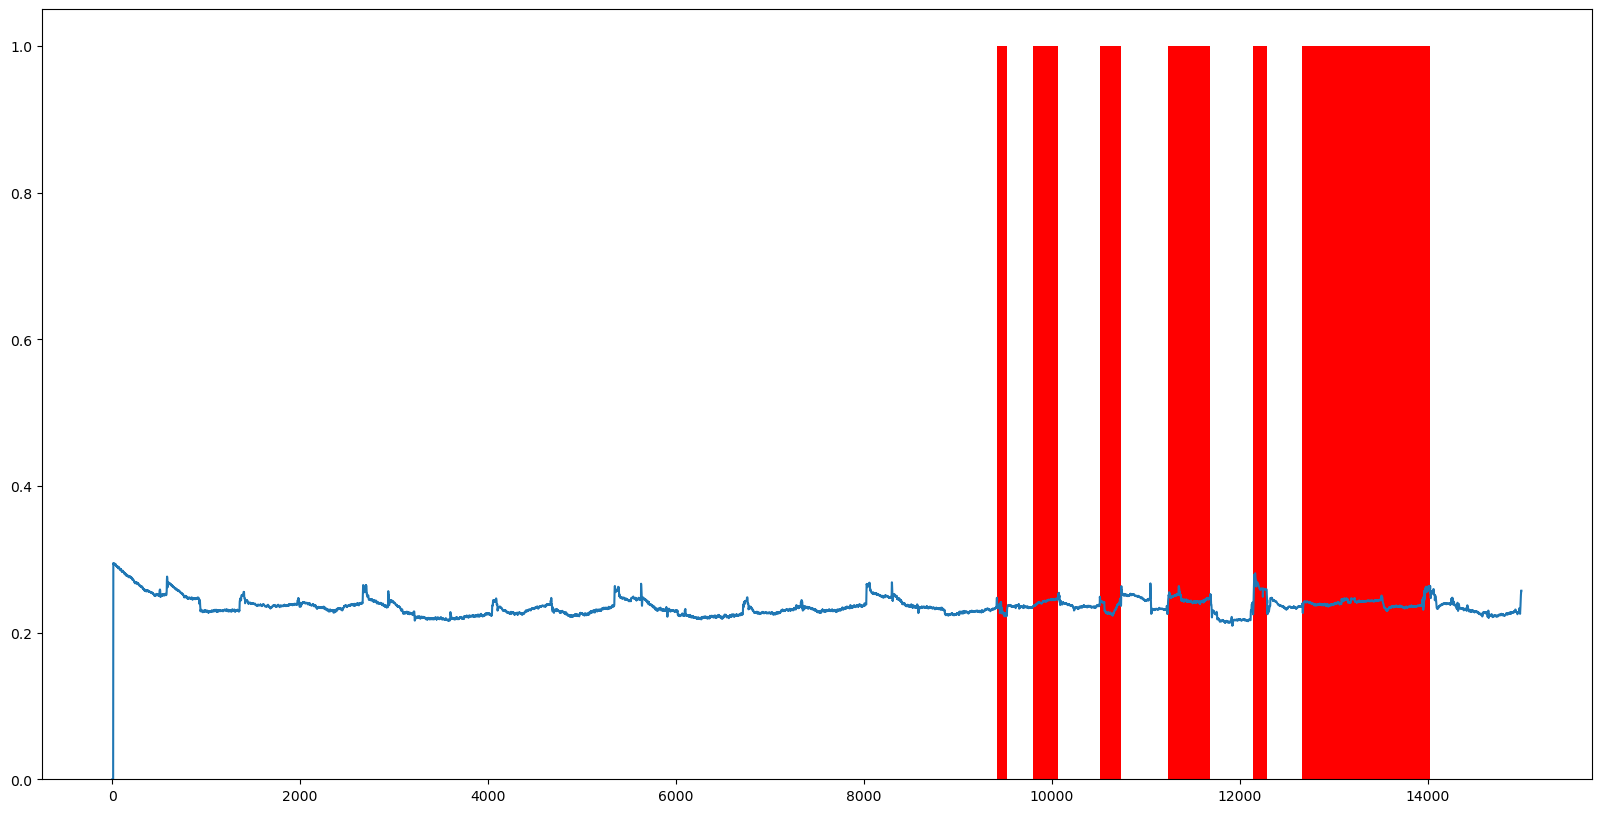

In [45]:
# add window_size - 1 zeros at the beginning of rms
rms_offset = np.concatenate((np.zeros(window_size), rms))

# plot bar at index where label == 1
plt.figure(figsize=(20, 10))
plt.plot(rms_offset)
plt.bar(np.where(one_hot_enc['Label'] == 1)[0], np.ones(len(np.where(one_hot_enc['Label'] == 1)[0])), color='red', width=1)



F1 score for 80th percentile: 0.26054054054054054
precision score for 80th percentile: 0.24124124124124124
recall score for 80th percentile: 0.28319623971797886
F1 score for 90th percentile: 0.13277393879565644
precision score for 90th percentile: 0.17945296864576385
recall score for 90th percentile: 0.1053662358010184
F1 score for 95th percentile: 0.10959733575537389
precision score for 95th percentile: 0.24133333333333334
recall score for 95th percentile: 0.0708969839404622


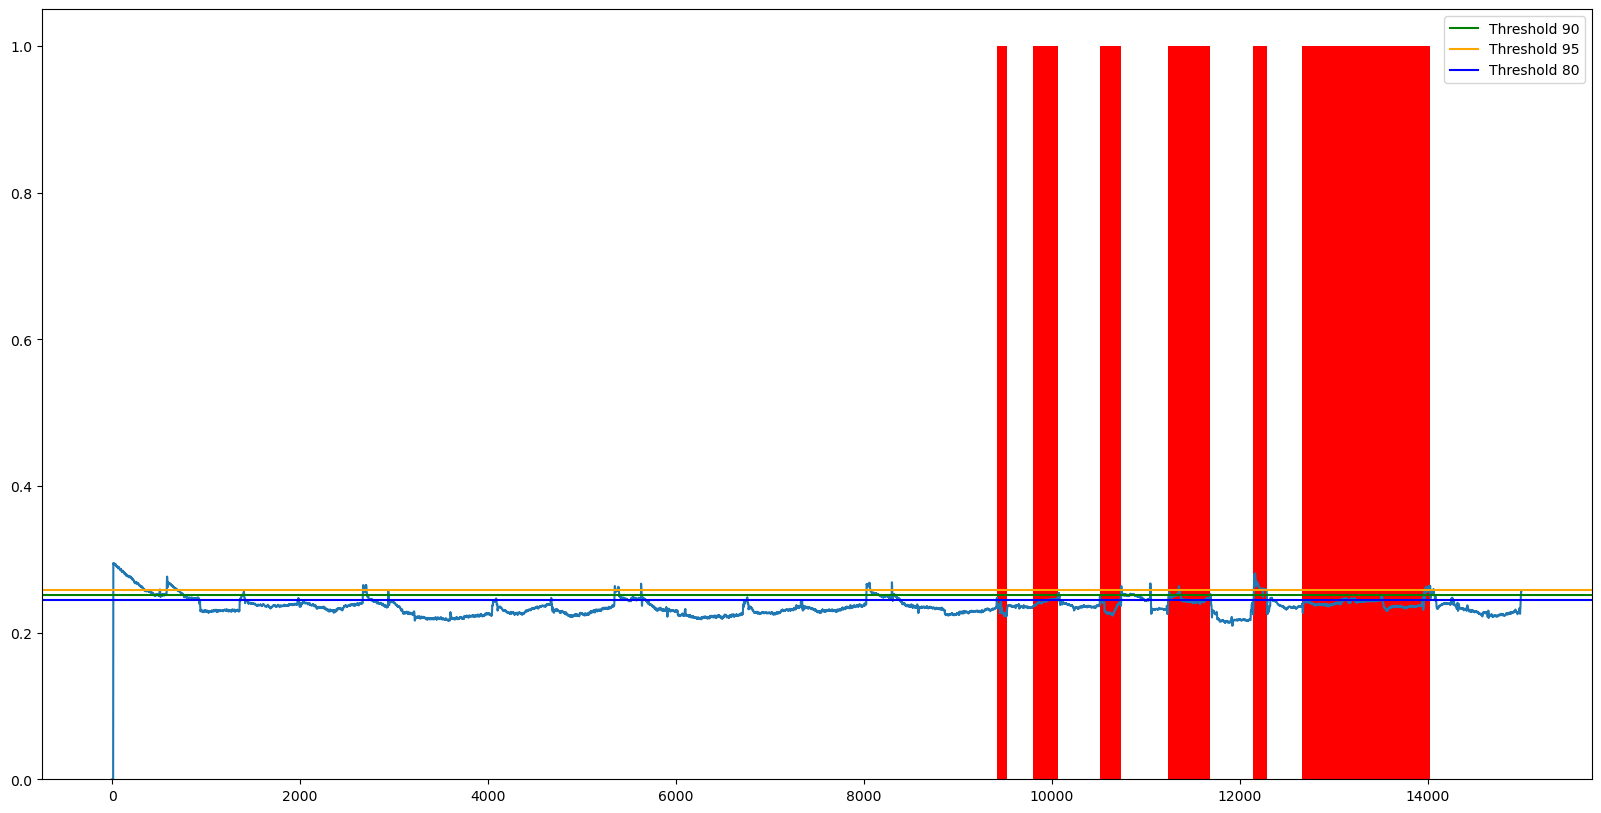

In [46]:
treshold_80 = np.percentile(rms, 80)
treshold_90 = np.percentile(rms, 90)
treshold_95 = np.percentile(rms, 95)

# compute the f1 score between the label == 1 and the elements of rms that are above the threshold
from sklearn.metrics import f1_score, precision_score, recall_score

# Get the indices of the RMS values that are above the threshold
rms_above_threshold_90 = np.where(rms > treshold_90)[0]
rms_above_threshold_95 = np.where(rms > treshold_95)[0]
rms_above_threshold_80 = np.where(rms > treshold_80)[0]

# Create a list of 0s with the same length as rms
rms_labels_90 = np.zeros(len(rms))
rms_labels_95 = np.zeros(len(rms))
rms_labels_80 = np.zeros(len(rms))

# Set the values at the indices above the threshold to 1
rms_labels_90[rms_above_threshold_90] = 1
rms_labels_95[rms_above_threshold_95] = 1
rms_labels_80[rms_above_threshold_80] = 1

# compute the f1 score between the label == 1, start at window_size elt and the elements of rms that are above the threshold
score_90 = f1_score(one_hot_enc['Label'][window_size:], rms_labels_90)
precision_90 = precision_score(one_hot_enc['Label'][window_size:], rms_labels_90)
recall_90 = recall_score(one_hot_enc['Label'][window_size:], rms_labels_90)
score_95 = f1_score(one_hot_enc['Label'][window_size:], rms_labels_95)
precision_95 = precision_score(one_hot_enc['Label'][window_size:], rms_labels_95)
recall_95 = recall_score(one_hot_enc['Label'][window_size:], rms_labels_95)
score_80 = f1_score(one_hot_enc['Label'][window_size:], rms_labels_80)
precision_80 = precision_score(one_hot_enc['Label'][window_size:], rms_labels_80)
recall_80 = recall_score(one_hot_enc['Label'][window_size:], rms_labels_80)

print("F1 score for 80th percentile:", score_80)
print("precision score for 80th percentile:", precision_80)
print("recall score for 80th percentile:", recall_80)
print("F1 score for 90th percentile:", score_90)
print("precision score for 90th percentile:", precision_90)
print("recall score for 90th percentile:", recall_90)
print("F1 score for 95th percentile:", score_95)
print("precision score for 95th percentile:", precision_95)
print("recall score for 95th percentile:", recall_95)

# Plot the RMS values and the threshold
plt.figure(figsize=(20, 10))
plt.plot(rms_offset)
plt.bar(np.where(one_hot_enc['Label'] == 1)[0], np.ones(len(np.where(one_hot_enc['Label'] == 1)[0])), color='red', width=1)
plt.axhline(treshold_90, color='green', label='Threshold 90')
plt.axhline(treshold_95, color='orange', label='Threshold 95')
plt.axhline(treshold_80, color='blue', label='Threshold 80')
plt.legend()

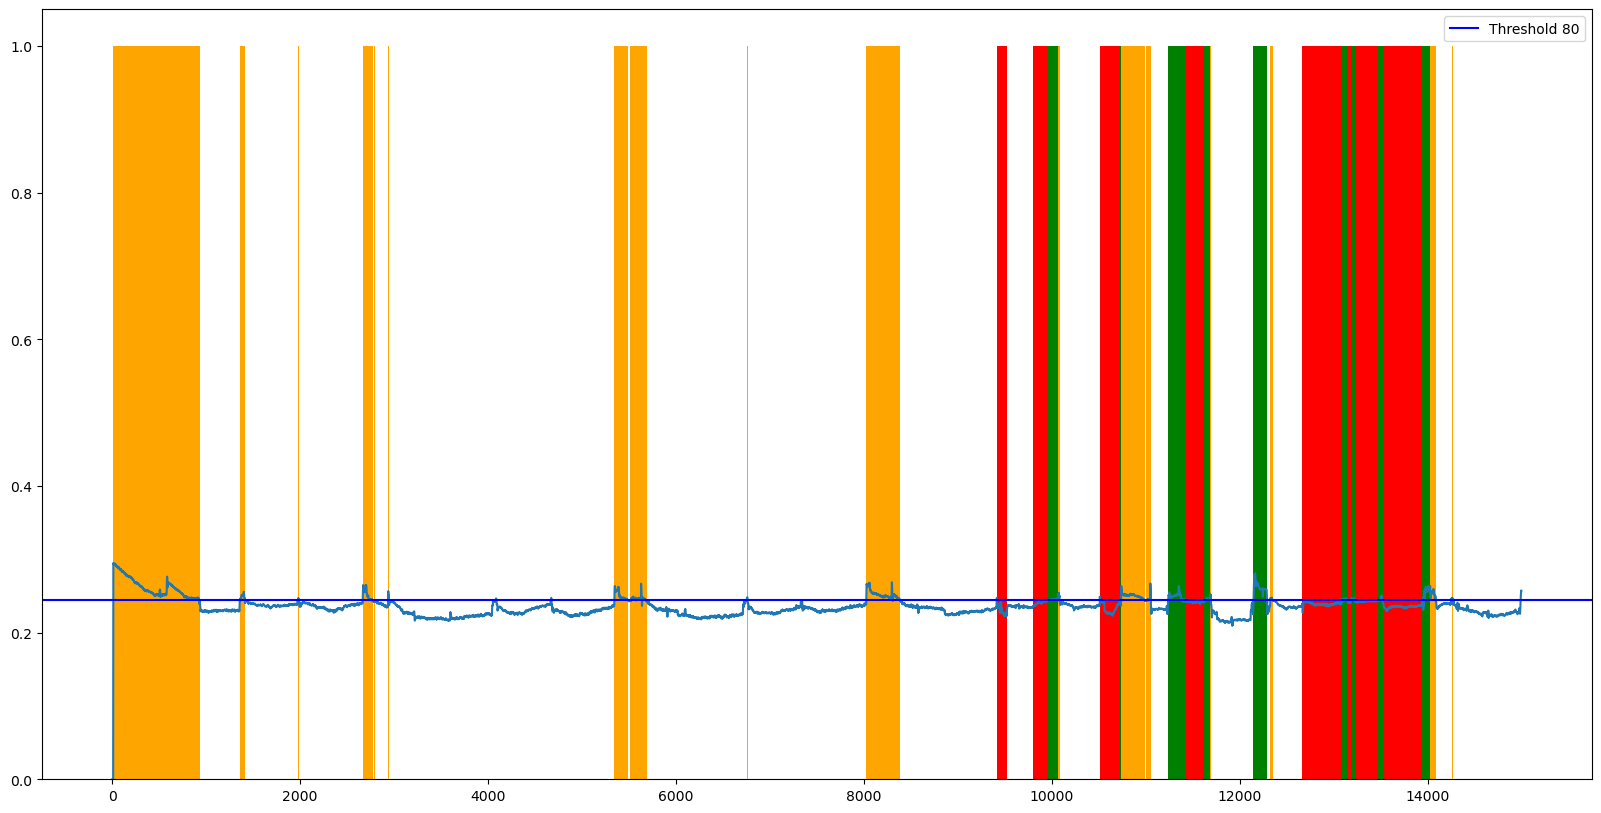

In [52]:
# plot the treshold 80%, the rms, and green bar where label == 1 and rms > treshold, and red bar where label == 1 and rms < treshold, do orange bar when rms > treshold 90% and label == 0
plt.figure(figsize=(20, 10))
plt.plot(rms_offset)
plt.bar(np.where((one_hot_enc['Label'] == 1) & (rms_offset < treshold_80))[0], np.ones(len(np.where((one_hot_enc['Label'] == 1) & (rms_offset < treshold_80))[0])), color='red', width=1)
plt.bar(np.where((one_hot_enc['Label'] == 1) & (rms_offset > treshold_80))[0], np.ones(len(np.where((one_hot_enc['Label'] == 1) & (rms_offset > treshold_80))[0])), color='green', width=1)
plt.bar(np.where((one_hot_enc['Label'] == 0) & (rms_offset > treshold_80))[0], np.ones(len(np.where((one_hot_enc['Label'] == 0) & (rms_offset > treshold_80))[0])), color='orange', width=1)
#plt.bar(np.where((one_hot_enc['Label'] == 0) & (rms_offset < treshold_80))[0], np.ones(len(np.where((one_hot_enc['Label'] == 0) & (rms_offset < treshold_80))[0])), color='green', width=1)

plt.axhline(treshold_80, color='blue', label='Threshold 80')
plt.legend()